## 1. Поиск вероятности

Пусть у вас есть $X_1, X_2, X_3$ случайные величины, которые независимы и одинаково равномерно распределены $X_i \sim U[0;2]$. Оцените следующие вероятности: 

1. $P(X_1 + X_2 + X_3^2 > 5)$
2. $P(X_1 + X_2 + X_3 > 0.8 \mid X_3 < 0.1)$

### Решение №1

In [20]:
import numpy as np

In [69]:
N = 10_000

x1 = np.random.uniform(0, 2, size=N)
x2 = np.random.uniform(0, 2, size=N)
x3 = np.random.uniform(0, 2, size=N)

np.mean(x1 + x2 + x3**2 > 5)

0.1509

In [70]:
x1_slice = x1[x3 < 0.1]
x2_slice = x2[x3 < 0.1]
x3_slice = x3[x3 < 0.1]

np.mean(x1_slice + x2_slice + x3_slice > 0.8)

# or
# np.mean((x1 + x2 + x3)[x3 < 0.1] > 0.8)

0.9391634980988594

### Решение №2

In [71]:
count = 0
n = 0

for i in range(N):
    if x3[i] < 0.1:
        n += 1
        count += (x1[i] + x2[i] + x3[i] > 0.8)
print(count / n)

0.9391634980988594


### Решение №3

In [72]:
from scipy import stats as sts

In [73]:
gen = sts.uniform(0, 2)

In [75]:
x1 = gen.rvs(N)
x2 = gen.rvs(N)
x3 = gen.rvs(N)

np.mean(x1 + x2 + x3**2 > 5)

0.1451

## Принц и принцесса

Давайте создадим функцию для игры. Есть принц, на старте игры у него есть h здоровья. Его цель – забраться по лестнице на башню, где находится принцесса, которую нужно спасти от великана. Количество ступенек равно m. Двигается он по одной ступеньке вверх. Но с каждым продвижением наверх с вероятностью p его бьет по голове великан и герой теряет z здоровья и остается на прежней ступеньке. Нужно понять, сможет ли принц забраться на башню. Это означает, что принц должен забраться на башню и остаться живым.

In [ ]:
h = 100
m = 10
p = 0.2
z = 10
cur_step = 0

while h > 0 and cur_step < m:
    print(f'Здоровье было: {h}')
    seen = np.random.choice([True, False], size=1, p=[p, 1 - p])[0]

    if seen:
        h = h - z
    else:
        cur_step = cur_step + 1
#     print(f'Заметил: {seen}')
#     print(f'Cтупенька: {cur_step}/{m}')
#     print(f'Здоровье стало: {h}')
#     input()

# h > 0

In [191]:
def game(h, m, p, z):
    cur_step = 0

    while h > 0 and cur_step < m:
        seen = np.random.choice([True, False], size=1, p=[p, 1 - p])[0]

        if seen:
            h = h - z
        else:
            cur_step = cur_step + 1
    return h > 0

In [192]:
game(h=100, m=10, p=0.2, z=10)

True

In [194]:
n = 10_000
win = 0

for i in range(n):
    win = win + game(h=110, m=15, p=0.3, z=30)
    
print(win / n)

0.1635


### 3. Удав и багеты

Удав Анатолий любит французские багеты. Длина французского багета равна $1$ метру. За один укус Удав Анатолий съедает кусок случайной длины, равномерно распределённый на отрезке $[0;1]$. Для того, чтобы съесть весь багет удаву потребуется случайное количество $N$ укусов. Найдите $E(N)$ и $Var(N)$

In [209]:
baget = 1
count = 0

while baget > 0:
    ukus = np.random.uniform(0, 1, size=1)[0]
    baget = baget - ukus
    count = count + 1
print(count)

3


In [213]:
def udav():
    baget = 1
    count = 0

    while baget > 0:
        ukus = np.random.uniform(0, 1, size=1)[0]
        baget = baget - ukus
        count = count + 1
    return count

In [226]:
results = []
for i in range(1_000_000):
    results.append(udav())

In [229]:
import math

In [230]:
math.exp(1)

2.718281828459045

In [227]:
np.mean(results)

2.717298

In [228]:
np.var(results)

0.7638855791960002

In [219]:
import matplotlib.pyplot as plt

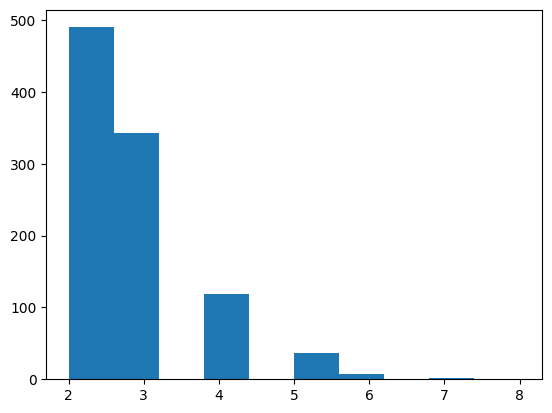

In [223]:
plt.hist(results);

In [257]:
x = np.random.uniform(0, 1, size=10)
x

array([0.92957764, 0.0584906 , 0.00477569, 0.73541234, 0.35802292,
       0.03327943, 0.83362412, 0.45195453, 0.0026109 , 0.19142651])

In [254]:
cum_x = np.cumsum(x)
cum_x

array([0.10101456, 0.43840971])

In [255]:
cum_x > 1

array([False, False])

In [256]:
2 - np.sum(cum_x > 1) + 1

11